In [1]:
#1
import pandas as pd
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [2]:
#2
analysis=df.pivot_table(values='id',index='race',columns='signs_of_mental_illness',aggfunc='count')
analysis

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [4]:
#3
def percentage (row):
    x=row[True]/(row[True]+row[False])
    return round(x,3)

In [5]:
analysis['%_of_mentally_ill']=analysis.apply(lambda row: percentage(row),axis=1)
analysis

signs_of_mental_illness,False,True,%_of_mentally_ill
race,,,
A,69,24,0.258
B,1114,184,0.142
H,745,157,0.174
N,64,14,0.179
O,37,11,0.229
W,1763,713,0.288


In [6]:
analysis[analysis['%_of_mentally_ill']==analysis['%_of_mentally_ill'].max()]

signs_of_mental_illness,False,True,%_of_mentally_ill
race,,,
W,1763,713,0.288


In [7]:
#4
df['week_day']=pd.to_datetime(df['date']).dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,week_day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [36]:
weekdays_analysis=df['week_day'].value_counts()
weekdays_analysis

week_day
Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: count, dtype: int64

In [37]:
days_ordered = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_analysis = weekdays_analysis.reset_index()
weekdays_analysis.columns = ['week_day', 'count']
weekdays_analysis['week_day'] = pd.Categorical(weekdays_analysis['week_day'], categories=days_ordered, ordered=True)
weekdays_analysis.sort_values('week_day',inplace=True)
weekdays_analysis

,week_day,count
5,Monday,726
1,Tuesday,816
0,Wednesday,829
2,Thursday,810
3,Friday,761
6,Saturday,721
4,Sunday,753


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

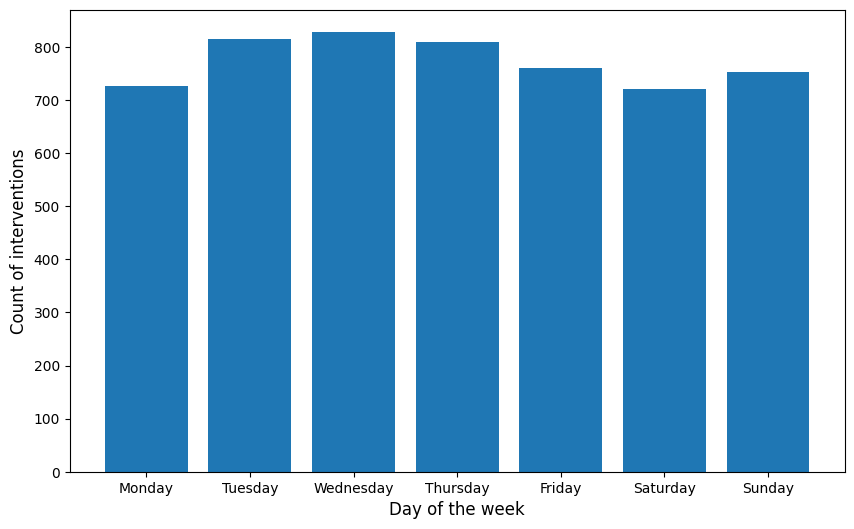

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(weekdays_analysis['week_day'], weekdays_analysis['count'])
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Count of interventions', fontsize=12)
plt.show()

In [40]:
#5
data = data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [41]:
df_states = data[0]
df_states.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%


In [42]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
df_abbrev = data[1]
df_abbrev.head()

,Name,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,Name,Status of region,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
1,United States of America,Federal state,US USA 840,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[2]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN


In [43]:
df_states.rename(columns={'State':'Name'},inplace=True)
df_combined = pd.merge(df_states,df_abbrev,on='Name')
df_selected = df_combined[['Name','Census population, April 1, 2020 [1][2]','ANSI']]
df_selected.head()

,Name,"Census population, April 1, 2020 [1][2]",ANSI
0,California,39538223,CA
1,Texas,30145505,TX
2,Florida,21538187,FL
3,New York,20201249,NY
4,Pennsylvania,13002700,PA


In [44]:
state_analysis=df['state'].value_counts()
state_analysis.head()

state
CA    799
TX    481
FL    350
AZ    254
CO    195
Name: count, dtype: int64

In [45]:
state_analysis=state_analysis.reset_index()
state_analysis.columns = ['ANSI', 'count']
state_analysis=pd.merge(state_analysis,df_selected,on='ANSI')
state_analysis.head()

,ANSI,count,Name,"Census population, April 1, 2020 [1][2]"
0,CA,799,California,39538223
1,TX,481,Texas,30145505
2,FL,350,Florida,21538187
3,AZ,254,Arizona,7151502
4,CO,195,Colorado,5773714


In [46]:
state_analysis['per_1000']=round(state_analysis['count']*1000/state_analysis['Census population, April 1, 2020 [1][2]'],4)
state_analysis

,ANSI,count,Name,"Census population, April 1, 2020 [1][2]",per_1000
0,CA,799,California,39538223,0.0202
1,TX,481,Texas,30145505,0.0160
2,FL,350,Florida,21538187,0.0163
3,AZ,254,Arizona,7151502,0.0355
4,CO,195,Colorado,5773714,0.0338
5,GA,182,Georgia,10711908,0.0170
6,OK,164,Oklahoma,3959353,0.0414
7,NC,156,North Carolina,10439388,0.0149
8,OH,155,Ohio,11799448,0.0131
9,WA,152,Washington,7705281,0.0197


In [48]:
df.to_csv('przestepczosc.csv')
weekdays_analysis.to_csv('przestepczosc_dni_tygodnia.csv')
state_analysis.to_csv('przestepczosc_stany.csv')